In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
import pandas as pd
import numpy as np
import random as randint
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import silhouette_score


In [4]:
#load the dataset

datafile =r'/gdrive/My Drive/CIS_508/Datasets/Sales_Transactions_Dataset_Weekly.csv'
data=pd.read_csv(datafile)
data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,...,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,...,0.72,0.33,0.33,0.33,0.61,0.33,0.00,0.50,0.11,0.44,0.22,0.50,0.11,0.33,0.22,0.39,0.11,0.44,0.22,0.39,0.50,0.17,0.11,0.61,0.39,0.33,0.50,0.78,0.22,0.44,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,...,0.60,0.20,0.00,0.60,0.20,0.70,0.70,0.90,0.40,0.70,0.20,0.40,0.50,0.30,0.50,0.80,0.50,0.50,0.30,0.10,0.30,0.20,0.30,1.00,0.50,0.20,0.70,0.30,0.20,0.50,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,...,0.09,0.36,0.82,0.45,0.36,0.73,0.64,0.36,0.36,0.91,0.73,0.45,0.64,0.45,1.00,0.18,0.00,0.91,0.73,0.55,0.36,0.45,0.36,0.55,0.27,0.82,0.82,0.55,0.00,0.18,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,11,8,4,5,4,15,7,11,9,15,4,6,7,11,7,9,6,10,10,2,6,7,2,5,12,5,19,8,6,8,...,0.18,0.12,0.76,0.29,0.53,0.41,0.76,0.12,0.24,0.29,0.53,0.29,0.41,0.24,0.47,0.47,0.00,0.24,0.29,0.00,0.18,0.59,0.18,1.00,0.35,0.24,0.35,0.35,0.59,0.24,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,...,0.33,0.07,0.67,0.33,0.47,0.80,0.20,0.67,0.53,0.20,0.47,0.40,0.33,0.60,0.33,0.40,0.67,0.00,0.13,0.00,0.13,0.13,0.40,0.27,0.07,0.33,0.33,0.13,0.13,0.33,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [5]:
def display_all(df):
  with pd.option_context("display.max_rows",1000):
    with pd.option_context("display.max_columns",1000):
      return(df)

display_all(data.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810
Product_Code,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,...,P780,P781,P782,P783,P784,P785,P786,P787,P788,P789,P790,P791,P792,P793,P794,P795,P796,P797,P798,P799,P800,P801,P802,P803,P804,P805,P806,P807,P808,P809,P810,P811,P812,P813,P814,P815,P816,P817,P818,P819
W0,11,7,7,12,8,3,4,8,14,22,15,3,12,14,19,30,49,40,26,13,12,8,3,36,26,14,44,34,13,46,7,15,15,47,34,41,36,37,31,41,...,0,9,5,15,3,3,1,1,4,2,3,4,0,0,0,0,2,2,6,3,3,3,1,3,2,0,4,0,0,0,0,5,3,1,4,0,0,1,0,0
W1,12,6,11,8,5,3,8,6,9,19,7,4,10,12,45,27,40,38,31,17,5,14,5,42,28,14,34,32,10,36,17,13,12,42,37,32,39,36,21,27,...,0,13,7,12,1,1,2,0,3,1,1,3,1,1,0,0,5,3,0,3,2,2,1,2,2,6,5,0,3,1,0,1,2,1,2,0,1,0,0,1
W2,10,3,8,13,13,2,3,10,10,19,15,1,9,9,47,27,40,39,45,11,9,8,4,27,33,9,33,36,12,45,6,10,11,24,26,39,43,43,28,27,...,0,15,4,7,2,4,2,2,3,1,5,4,0,1,1,0,0,2,3,5,1,0,1,3,5,3,7,2,3,0,1,3,0,1,2,1,0,0,0,0
W3,8,2,9,5,11,7,7,9,7,29,14,6,6,11,42,43,28,38,36,10,8,9,3,33,32,8,39,41,17,34,7,4,17,55,27,45,42,52,39,51,...,0,15,6,16,1,0,2,0,5,6,2,2,1,4,0,1,3,2,1,3,0,3,0,3,3,2,4,0,3,1,0,5,0,3,6,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Normalized 47,0,0.4,0.45,0.35,0.2,0.45,0.6,0.25,0.27,0.29,0.19,0.33,1,0.23,0.33,0.72,0.31,0.07,0.38,0,0.67,0.82,0.11,0.64,0.55,0.33,0.26,0.36,0.38,0.43,0.5,0.62,0.67,0.34,0.8,0.29,0.15,0.2,0.29,0.59,...,0,0.52,0.5,0.26,0.86,0.8,0.67,0.43,0.27,1,0.13,0.18,0.25,0.67,0,0,0.4,0.89,0.33,0.36,0.6,0.25,0.25,0.33,0.57,0.5,0.78,0.33,0.07,0.25,0.33,0.33,0.5,0.13,0.5,0.33,0.71,0,0,0
Normalized 48,0.22,0.5,1,0.71,0.13,0.27,0.2,0.33,0.47,0.38,0.75,0.22,0.74,0.36,0.33,0.28,0.37,0.29,0.48,0.47,0.67,0.71,0.67,0.23,0.38,0.39,0.74,0.23,0.52,0.23,0.31,0.08,0.73,0.34,0,0.29,0.24,0.68,0.38,0.52,...,0,0.52,0.38,0.57,0,0.6,0.17,0.29,0.09,0.22,0.5,0.18,0.5,0.33,0.4,0.33,0.2,0.56,0.33,0.45,0.6,0.5,0.5,0.11,0.57,0.13,0.33,0.67,0.36,0.5,0,0.44,0.33,0.38,0.25,0,0.71,0,0,0
Normalized 49,0.17,0.1,0.45,0.35,0.53,0.27,0.4,0.08,0.6,0.58,0.31,0.44,0.58,0.45,0.45,0.28,0.37,0.32,0.34,0.27,0.75,0.18,0.22,0.67,0.34,0.44,0.29,0.18,0.33,0.4,0.44,0.23,0.8,0.69,0.04,0.21,0.15,0.37,0.35,0.07,...,0,0.38,0.63,0.35,0.57,1,0.83,0.14,0.27,0.78,0.38,1,1,0.89,0.2,0,0.4,0.44,0.33,1,0.8,0.25,0.25,0.22,0.57,0.5,1,0.5,0.36,0,0,0.56,0,0.13,1,0,0.71,0,0,0
Normalized 50,0.11,0.6,0.45,0.29,0.33,0.91,0.2,0.5,0.27,0.38,0.31,0.67,0.47,0.41,0.58,0.03,0.26,0.32,0.28,0.67,0.17,0.59,0.44,0.46,0.21,0.39,0.42,0.55,0.29,0.07,0.19,0.23,0.87,0.56,0.76,0.4,0.44,0.1,0.38,0.17,...,0,0.52,0.75,0.87,1,0.4,0.67,0.29,0.55,0.33,0.13,0.36,0.25,0.78,0.4,0.33,1,0.67,0.33,0.82,0.8,0.33,0.5,0.89,0.86,0.25,0.67,0.83,0.5,1,0,0.33,0.17,0.5,0.44,0.67,0.86,1,1,0


In [6]:
normalized_data=data.iloc[:,55:]
display_all(normalized_data)

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,Normalized 10,Normalized 11,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,0.44,0.61,0.72,0.33,0.33,0.33,0.61,0.33,0.00,0.50,0.11,0.44,0.22,0.50,0.11,0.33,0.22,0.39,0.11,0.44,0.22,0.39,0.50,0.17,0.11,0.61,0.39,0.33,0.50,0.78,0.22,0.44,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,0.20,0.20,0.60,0.20,0.00,0.60,0.20,0.70,0.70,0.90,0.40,0.70,0.20,0.40,0.50,0.30,0.50,0.80,0.50,0.50,0.30,0.10,0.30,0.20,0.30,1.00,0.50,0.20,0.70,0.30,0.20,0.50,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,1.00,0.55,0.09,0.36,0.82,0.45,0.36,0.73,0.64,0.36,0.36,0.91,0.73,0.45,0.64,0.45,1.00,0.18,0.00,0.91,0.73,0.55,0.36,0.45,0.36,0.55,0.27,0.82,0.82,0.55,0.00,0.18,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,0.35,0.12,0.18,0.12,0.76,0.29,0.53,0.41,0.76,0.12,0.24,0.29,0.53,0.29,0.41,0.24,0.47,0.47,0.00,0.24,0.29,0.00,0.18,0.59,0.18,1.00,0.35,0.24,0.35,0.35,0.59,0.24,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,0.33,0.13,0.67,0.53,0.20,0.27,0.40,0.73,0.40,0.40,0.53,1.00,0.33,0.07,0.67,0.33,0.47,0.80,0.20,0.67,0.53,0.20,0.47,0.40,0.33,0.60,0.33,0.40,0.67,0.00,0.13,0.00,0.13,0.13,0.40,0.27,0.07,0.33,0.33,0.13,0.13,0.33,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.00,0.00,0.33,0.00,0.00,0.67,0.33,0.00,0.00,0.33,0.00,0.00,0.33,0.00,0.33,0.33,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.67,0.33,0.00,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,0.00,0.14,0.00,0.00,0.14,0.29,0.29,0.86,0.00,0.14,0.00,0.29,0.29,0.00,0.71,0.14,0.14,0.14,0.29,0.43,0.14,0.00,0.29,0.14,1.00,0.43,0.43,0.43,0.29,0.29,0.43,0.14,0.14,0.57,0.71,0.57,0.43,0.29,0.57,0.86,0.86,1.00,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,0.25,0.00,0.00,0.00,0.25,0.25,0.50,0.25,0.25,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.25,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.50,0.00,1.00,0.50,0.50,0.00,0.50,0.50,0.00,0.50,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


Text(0.5, 1.0, 'Plotting the clusters from our original dataset')

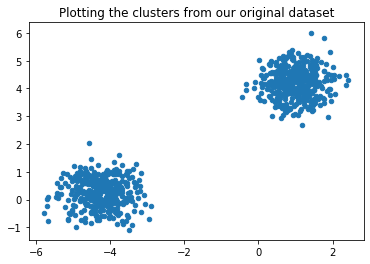

In [7]:
normalized_data, y_true = make_blobs(n_samples=800, centers=2,
                       cluster_std=0.50, random_state=3)
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], s=20);
plt.title("Plotting the clusters from our original dataset")

In [8]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB


,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,...,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.00000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,9.790382,9.678175,9.827374,9.686806,9.907522,10.045623,10.033292,9.905055,10.007398,9.644883,9.849568,9.710234,9.902589,9.861899,10.166461,8.892725,6.950678,7.193588,7.383477,7.339088,7.607891,7.610358,7.759556,7.906289,7.992602,7.997534,8.014797,8.073983,8.251541,7.965475,...,0.338878,0.331591,0.355771,0.344821,0.335919,0.345253,0.354994,0.330210,0.340271,0.353551,0.366017,0.370629,0.417694,0.389618,0.207596,0.223046,0.229605,0.224365,0.240493,0.250395,0.248323,0.259371,0.262256,0.268903,0.270173,0.273144,0.277497,0.264994,0.286375,0.279396,0.299149,0.287571,0.304846,0.316017,0.334760,0.314636,0.33815,0.358903,0.373009,0.427941
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,13.577685,13.007548,13.366525,13.214865,13.389975,13.743655,13.890316,13.364486,13.560015,13.129259,13.473781,12.827964,13.003290,12.617572,12.298777,10.016879,9.449151,9.729464,10.187970,10.161884,10.600332,10.390931,10.714137,10.838140,10.824638,10.773653,10.950947,10.854683,11.272094,10.758691,...,0.299536,0.289895,0.300587,0.312811,0.301809,0.302416,0.299286,0.297747,0.299420,0.294376,0.304491,0.303188,0.315159,0.323586,0.214272,0.226805,0.229479,0.229580,0.235536,0.248798,0.237675,0.247164,0.248657,0.249708,0.257877,0.248350,0.253397,0.246666,0.262363,0.253084,0.266993,0.256630,0.263396,0.262226,0.275203,0.266029,0.27569,0.286665,0.295197,0.342360
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [22]:
#lets divide the data into two clusters

kmeans=KMeans(n_clusters=2,init='k-means++')
kmeans.fit(normalized_data)
y_kmeans = kmeans.predict(normalized_data)

print("inertia when the cluster sizes are 2:",kmeans.inertia_)
print(silhouette_score(data_scaled,kmeans.labels_))

inertia when the cluster sizes are 2: 408.3185654465807
0.8606793210761201


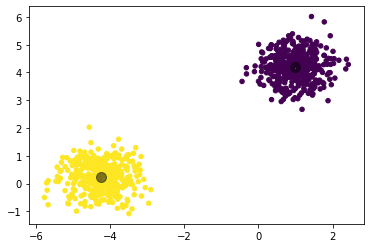

In [10]:
#plotting the clusters after runnig the initial k- means clustering - without scaling the data

plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)


In [11]:

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(normalized_data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,800.000000,800.000000
mean,0.505616,0.465482
std,0.325988,0.287489
min,0.000000,0.000000
25%,0.184888,0.187218
50%,0.500404,0.483764
75%,0.825707,0.744988
max,1.000000,1.000000


In [12]:
#lets try and find out different cluster sizes

kmeans=KMeans(n_clusters=7,init='k-means++',precompute_distances=True,max_iter=200)
kmeans.fit(normalized_data)
y_kmeans = kmeans.predict(normalized_data)

print("inertia when the cluster sizes are 7:",kmeans.inertia_)


inertia when the cluster sizes are 7: 164.72442686093126


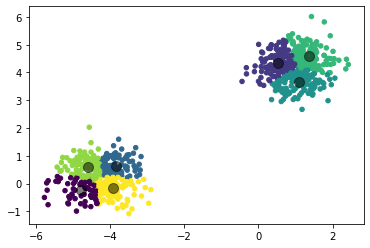

In [13]:
#plotting the clusters after runnig the k- means clustering

plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)


In [14]:
#lets try and find out different cluster sizes

kmeans=KMeans(n_clusters=9,init='k-means++')
kmeans.fit(normalized_data)

print("inertia when the cluster sizes are 9:",kmeans.inertia_)


inertia when the cluster sizes are 9: 130.43584164172165


In [15]:
#lets try and find out different cluster sizes

kmeans=KMeans(n_clusters=13,init='k-means++')
kmeans.fit(normalized_data)

print("inertia when the cluster sizes are 13:",kmeans.inertia_)


inertia when the cluster sizes are 13: 93.34780790752916


[150.94553070843185, 7.132136708249756, 5.722391220515171, 4.407152429374669, 3.798949635361619, 3.1933520024117894, 2.820140783897893, 2.457531768168021, 2.2255504528211025, 2.0249211989351155, 1.8732586899895045, 1.7382722429001762, 1.6207441102787468, 1.4805961913680925, 1.3972193000421451, 1.301552522464835, 1.2427090525972309, 1.1710232389806512, 1.1020568850469052]


Text(0, 0.5, 'Inertia')

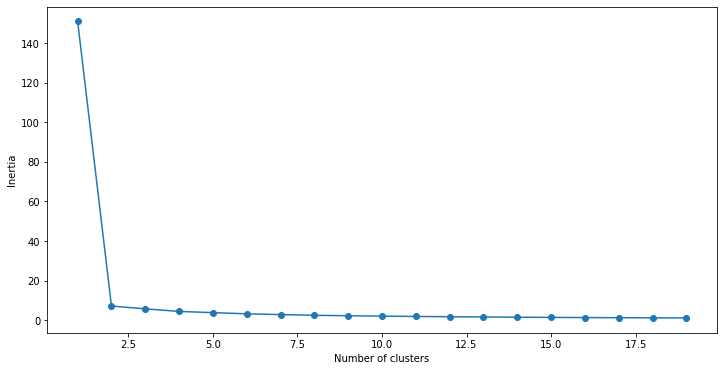

In [16]:
#trying to plot different cluster size on the graph

clist = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    clist.append(kmeans.inertia_)

print(clist)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'clist':clist})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['clist'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Here, from the plot we can clearly find out the optimal number of clusters and use in our K-Means clustering. It seems that 2 or 3 would be the optimal number of clusters which we can use, otherwise it might overfit the data.




In [21]:
#optimal clusters from the plot : 2 with manual hyper parameter tuning best paramters

kmeans=KMeans(n_clusters=2,init='k-means++',precompute_distances=True,max_iter=400,random_state=0,verbose=2)
kmeans.fit(data_scaled)
y_kmeans=kmeans.predict(data_scaled)

print("inertia when the cluster sizes are 2:",kmeans.inertia_)

print(silhouette_score(data_scaled,kmeans.labels_))


Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 7.132136708249756
start iteration
done sorting
end inner loop
Iteration 1, inertia 7.132136708249756
center shift 0.000000e+00 within tolerance 9.434096e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 7.132136708249756
start iteration
done sorting
end inner loop
Iteration 1, inertia 7.132136708249756
center shift 0.000000e+00 within tolerance 9.434096e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 7.132136708249756
start iteration
done sorting
end inner loop
Iteration 1, inertia 7.132136708249756
center shift 0.000000e+00 within tolerance 9.434096e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 7.132136708249756
start iteration
done sorting
end inner loop
Iteration 1, inertia 7.132136708249756
center shift 0.000000e+00 within tolerance 9.434096e-06
Initialization c

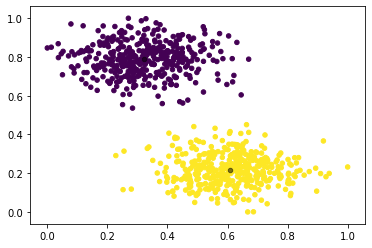

In [0]:
#plotting the clusters after runnig the final k- means clustering

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=0.5)


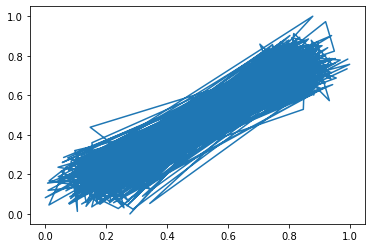

In [0]:
#lets plot the line of clusters

line, = plt.plot(data_scaled[:,0],data_scaled[:,1], '-')